
# **Determinants of Audit Fees**

## 1) Introduction to Regression Analysis

Regression analysis is one of the most common methods used in Statistical Data Analysis. It is a method for estimation of relationship between a dependent / response variable and one or more independent / predictor variables. In statistics, the response variable is generally denoted by 'Y' and the predictor variables are denoted by 'X'.

The practise of explaining the Y variable with regards to the X variable is known as model fitting. The most common form of regression model is Linear Regression model, in which we find a line that closely fits the data and can be mathematically expressed as Y = a + bX. 

When we run regressions, we not only estimate the parameters a and b that can then be used for predictions, we also get to understand how well the model fits, i.e. how much variance in Y is explained by a + bX.

The most important part of fitting regression models is defining the Y and X variables. The response variable is often easy to define as it is the variable we want to study. However, in finalizing the X variables, we need to take into consideration many things. Some of the vital questions to be asked are: number of available variables? Of those available variables, do we need to consider all in our model or can any be left out? Do we need to normalize the selected variables by scaling or taking log values and so on. This process of extracting the features from raw data by performing EDA and using the domain knowledge is known as Feature Engineering. It is useful to improve the performance of the machine learning alogrithm.

Once the X variables are finalized, we can fit the Ordinary Least Square (OLS) Regression model and predict the response variable. The performance of the model i.e. how much variability of Y can be explain by our model, is verified using the R-Square values. Higher the R-Square value, better the model fit.


## 2) Project Scope


For this project, we are considering two dataset:
    
    1) Audit Fees 201019 from Audit Analytics database.
    2) Compustat 201019 from the Compustat Annual Industrial File.

The first file contains the information related to the audit fees charged by the audit firms. This contains out variable of interest i.e. response variable: Audit Fees.

The second file contains the information related to the structure and financial characteristics of the companies to whom the audit fees are charged like the size of the firm, earnings for the year, number of employees and so on. These are going to be our predictor variables i.e. X variables.

Our goal here is to determine the relationship between Audit Fees (Y variable) and the different characteristics of the firms i.e X variables. For this purpose, we will be using the OLS regression analysis to fit the model on the given data. However before fitting the model, we need to do some feature engineering to select the variables that most affect the response variable. This will be done in 2 ways:

    1) Performing Exploratory Data analysis to draw insights from the raw data by summarizing, visualising and intrepreting the information.  
    2) Conducting library search fot Audit fees / Pricing models and then using our judgement on the basis of business knowledge.
    
Once the features are defined and tuned, we will fit the regression model, see how well it performs and possibly improve the results by re-fitting the model if required.


## 3) Code, Explanation and Analysis


### Preliminary Steps:

Importing the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Data reading, Merging and Data Cleaning:

In [2]:
# Reading the first file containing details of Audit fees and converting it into dataframe.

mydir = 'C:/RIT/Spring 2021/BANA 680 - Data Management for Business Analytics/Assignment 2 - Regression/'
file = mydir + 'BANA-680 Assignment 4 OL AuditFees201019.csv'
AuditFees = pd.read_csv(file, encoding = "ISO-8859-1")
fees = pd.DataFrame(AuditFees)

# Displaying tiop 2 rows of the df
fees.head(2)

,FISCAL_YEAR,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,BEST_EDGAR_TICKER
0,2009,02JAN2010,643000,Grant Thornton LLP,20,NaN
1,2010,31MAY2010,1490000,KPMG LLP,1750,AIR


In [3]:
# Renaming a few columns for better understanding
fees = fees.rename(columns = {'FISCAL_YEAR': 'fyear', 'BEST_EDGAR_TICKER': 'tic', 
                              'FISCAL_YEAR_ENDED': 'fyearend'})

# Checking for the data structure and null values in the file

print('Data Structure of Fees:', fees.shape)
print('Null values in each columns:', '\n', fees.isna().sum())

Data Structure of Fees: (101178, 6)
Null values in each columns: 
 fyear               0
fyearend            0
AUDIT_FEES          0
AUDITOR_NAME        0
COMPANY_FKEY        0
tic             48711
dtype: int64


In [4]:
# Reading Compustat file

Compstat = pd.read_csv(mydir + 'BANA-680 Assignment 4 OL Compustat201019.csv')
comp = pd.DataFrame(Compstat)

# Displaying top 2 rows
comp.head(2)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
0,1004,20100531,2009.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,746.906,95.415,134.345,5.8,496.904,325.55,NaN,11.0,A,USA
1,1004,20110531,2010.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,835.845,137.016,196.312,6.1,507.274,416.01,NaN,11.0,A,USA


In order to fit the model later, we need to merge this two datasets now and then perform EDA for selecting X variables.

Since both the dfs have 'fyear' and 'tic' as common columns, we will merge the df on these two columns.

Therefor we will first check for any missing values in the 'fyear' and 'tic' columns in comp df and drop thoses observations if any. Then we will merge the 2 dfs using 'Inner Join' as we want the observation where these two values are not missing.


In [5]:
# Droping the observations where 'tic' or 'fyear' values are null
comp = comp.dropna(subset=['tic', 'fyear'])

In [6]:
# Merging the two dataframes & displaying first 2 rows
df = pd.merge(fees, comp, on = ['tic', 'fyear'], how = 'inner')
df.head(2)

,fyear,fyearend,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,tic,gvkey,datadate,indfmt,consol,...,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic
0,2010,31MAY2010,1490000,KPMG LLP,1750,AIR,1004,20110531,INDL,C,...,835.845,137.016,196.312,6.1,507.274,416.010,NaN,11.0,A,USA
1,2011,31MAY2011,1275000,KPMG LLP,1750,AIR,1004,20120531,INDL,C,...,864.649,142.360,222.693,6.7,599.752,473.226,NaN,11.0,A,USA


In [7]:
# Understanding the new df and checking for missing values
print('Data Structure of Fees:', df.shape)
print('Null values in each columns:', '\n', df.isna().sum())

Data Structure of Fees: (49387, 26)
Null values in each columns: 
 fyear               0
fyearend            0
AUDIT_FEES          0
AUDITOR_NAME        0
COMPANY_FKEY        0
tic                 0
gvkey               0
datadate            0
indfmt              0
consol              0
popsrc              0
datafmt             0
conm                0
curcd               0
act             15545
at               1002
ceq              1094
ebit             7871
ebitda           9282
emp              2785
invt             6032
lct             15460
pifo            33977
exchg               0
costat              0
fic                 0
dtype: int64


We can see from this that our merged df contains less observations as compared to our original files. Also that there are lot of missing values present here and some unnecessary categorical data columns.

In order to proceed further, we first need to handle missing values and drop the unnecessay columns

We will handle missing values by dropping the columns having more than 30% null values.

In [8]:
# Dropping unncessary columns
df = df.drop(columns = ['datadate', 'indfmt', 'consol', 'popsrc', 'datafmt', 'conm',
                        'exchg', 'costat', 'fic'], axis = 1)

# Checking for Columns having null values > 30% 
df_null = (df.columns[df.apply(lambda col: col.isna().sum()/len(df) >= 0.30)])
print(df_null)

Index(['act', 'lct', 'pifo'], dtype='object')


It can be seen from the above that columns 'act', 'lct' and 'pifo' has more than 30% missing values. Thus, just thinking from the statistics point of view, we should drop these columns. 

However, according to a research paper on Analytical study on determinant of Audit fees published in 1988 [Ref. 1], Current Liability, Current Assets and the Earning of the company plays a key role in determining the audit fees for that company. Thus, we would not drop these columns.

Thus, we would just drop the column 'pifo' from the df as it contains 68% null values.


In [9]:
df = df.drop(columns = 'pifo', axis = 1)

#### Exploratory Data Analysis:

A) Descriptive Statistics and Visualization of Response variable i.e. Audit Fees 

count       49387.000000
mean      2416306.128597
std       6342474.558232
min             0.000000
25%        186171.500000
50%        687779.000000
75%       1925530.000000
max     144500000.000000
Name: AUDIT_FEES, dtype: float64


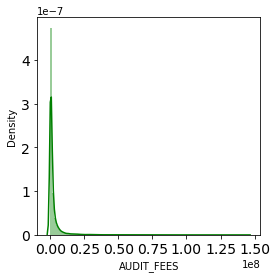

In [10]:
# Displaying descriptive statistics of Response Variable
with pd.option_context('float_format', '{:f}'.format): print(df['AUDIT_FEES'].describe()) 

# plotting distribution

plt.figure(figsize=(4,4))
sns.distplot(df['AUDIT_FEES'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14)
plt.show()

From the above plot and descriptive statistics, we can see that audit fees have a right skewed distribution. Further, it is spread over a wide range.

A research paper on Empirical model states that taking a natural log would fit the model better and handle the extreme values if the values have wide range. However, in our case, I tried taking the log and find correlatin but the model works better if the values are kept as it is. So we will work with the original values here.


B) Visualization and Correlation for predictor variables

Extracting the numeric variables in a new df and then plotting the histograms of them to find any matching trend with Audit Fees.

In [11]:
# Extracting numeric variables
df_num = df.select_dtypes(include = ['float64', 'int64'])
#df_num.head(2)

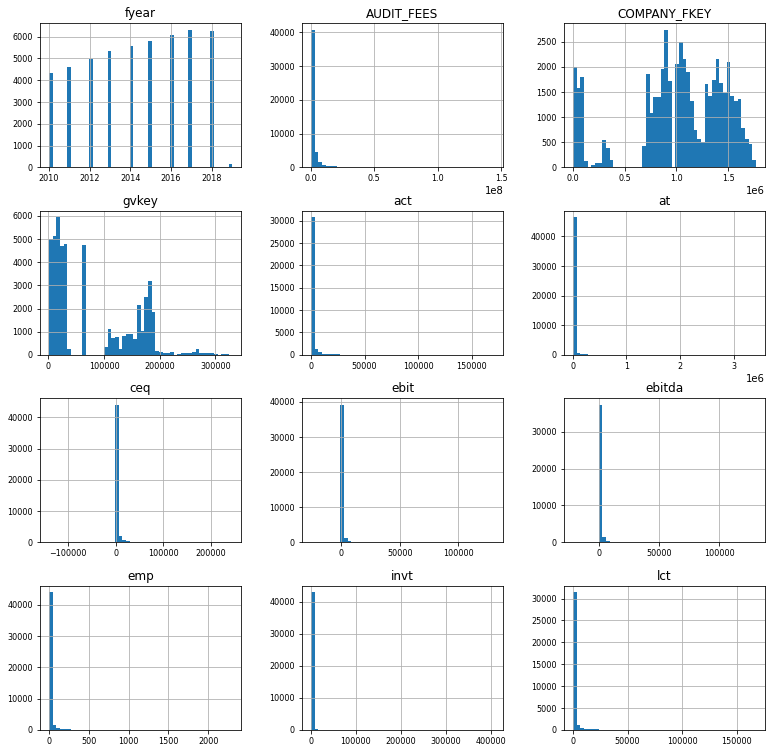

In [12]:
# plotting histograms
df_num.hist(figsize=(13, 13), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

We can see from the above histograms most of the variables have similar trend to that of Audit fees. The expections are: 'fyear' as it is discreate variable, 'Company_fKey' and 'gvkey'.

So we can guess that the variables having similar trend would have positive correlation with Audit fees. We will confirm that by computing the correlation and plotting the heatmap of correlation matrix.

#### Feature Selection using Correlation

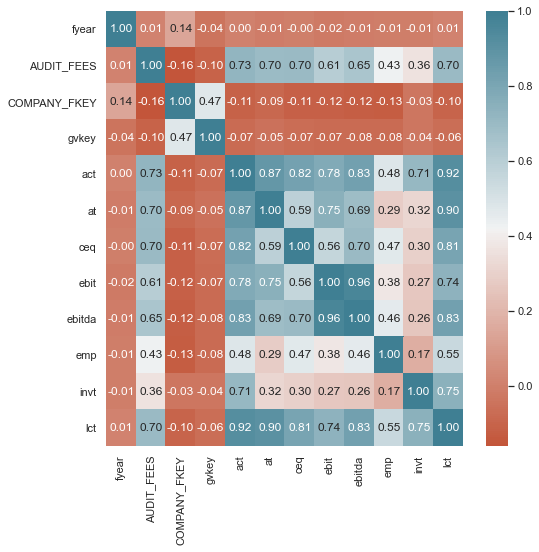

In [13]:
# plotting correlation matrix
corr_mat = df_num.corr()
sns.set_theme(style = 'white')
plt.figure(figsize = (8,8))
sns.heatmap(corr_mat, annot = True, cmap=sns.diverging_palette(20, 220, n=200), fmt = '.2f')
plt.show()

In [14]:
# Computting correlation
df_num_corr = df_num.corr()['AUDIT_FEES'][2:]
print('Correlations', '\n', df_num_corr)

# selecting the features with correlation > 0.5 for our model
imp_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print('\n','Features with correlation > 0.5', '\n', imp_features)

Correlations 
 COMPANY_FKEY   -0.160440
gvkey          -0.103786
act             0.726964
at              0.697098
ceq             0.698290
ebit            0.607688
ebitda          0.651015
emp             0.428551
invt            0.361974
lct             0.698428
Name: AUDIT_FEES, dtype: float64

 Features with correlation > 0.5 
 act       0.726964
lct       0.698428
ceq       0.698290
at        0.697098
ebitda    0.651015
ebit      0.607688
Name: AUDIT_FEES, dtype: float64


Plotting the imp_features against audit fees including the best fit for better visualization

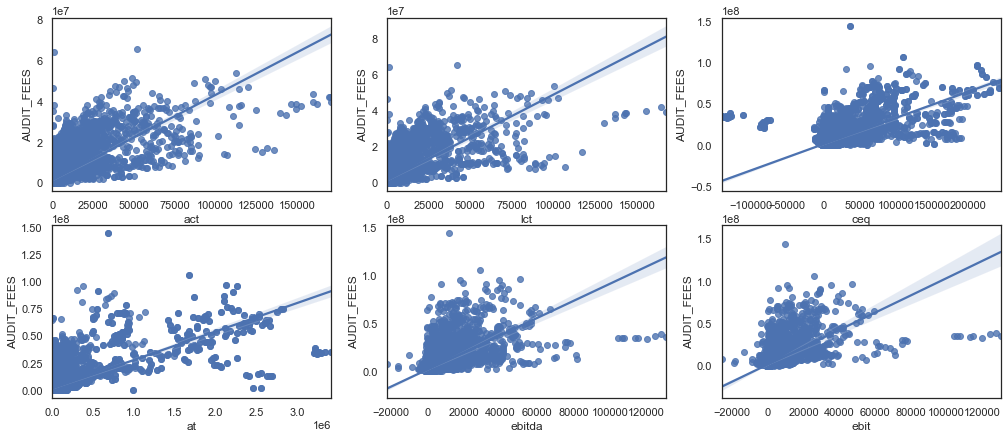

In [15]:
feature_list = imp_features.index.tolist()
feature_list.append('AUDIT_FEES')
fig, ax = plt.subplots(round(len(feature_list) / 4), 3, figsize = (17, 7))
for i, ax in enumerate(fig.axes):
    if i < len(feature_list) - 1:
        sns.regplot(x=feature_list[i],y='AUDIT_FEES', data=df, ax=ax)
plt.show()

#### Fitting Regression model

In [16]:
result = sm.ols(formula = "AUDIT_FEES ~ act + lct + ceq + at + ebit + ebitda", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     8157.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:54:44   Log-Likelihood:            -5.4006e+05
No. Observations:               33279   AIC:                         1.080e+06
Df Residuals:                   33272   BIC:                         1.080e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.21e+06   1.53e+04     78.867      0.000    1.18e+06    1.24e+06
act          284.2253      6.078     46.761      0.000     272.312     296.139
lct         -138.8472      7.905    -17.563      0.000    -154.342    -123.352
ceq         -191.7186      4.595    -41.720      0.000    -200.726    -182.711
at           183.1377      2.761     66.324      0.000     177.726     188.550
ebit         472.2318     29.397     16.064      0.000     414.613     529.851
ebitda      -478.7113     28.899    -16.565      0.000    -535.355    -422.068
==============================================================================
Omnibus:                    23476.213   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3084565.523
Skew:                           2.530   Prob(JB):                         0.00
Kurtosis:                      49.893   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary we conclude that R-Square for our model is 59.5%. Which means, our model with the said six variables explains 59.5% variability in Audit fees. Thus we can say that it is a pretty decent model. 

But here we have overlooked the correlation of each feature with one another. In other words, are there more than one variable explaining the same thing. In Statistics, this concept is known as multicollinearity. It is often suggested to just keep one of the similar factors in the final model so as to avoid multicolinearity and get a better model fit. 

However, in our case, we have already narrowed the factors to six variables and narrowing it further is lowering the R-square for the model. So we are considering this as our final model.

## 4) Summary

From the above analysis we can say that EDA and visualizations are the import preliminary steps in analyzing the data as it  allow us a quick and close to accurate insights about the features. Just by having a look at the plots we can identify the features having same trend and affecting the response variable. This gives us the broad idea about the data and we can decide on the next steps accordingly.

Post EDA comes analysis of numerical data as these are the features that mainly affect the response variable and form part of the final model. 

In our case, we finalized the model based on six features identified above and it gave us R-Square of 59.5%. I.e our model can explain 59.5% variation in Audit Fees.

We also saw that the variable scaling or normalization won't always work. It depends on data to data. In our case, normalizing the data with taking natural log of Audit fees gave totally opposite results. 

More over, it can be seen from the different research papers that there are so many other factors affecting the detemination of Audit fees like corporate size of the firm, The Financial ratios of the company, degree of corporate complexity and risks, popularity of audit firm, etc. We have studied only limited number of factors in our analysis, where as there are several other factors contributing to determination of Audit fees. 

## 5) References

1) Determinant of Audit Fees - Analytical Study: https://www.ros.hw.ac.uk/bitstream/handle/10399/1006/Ramzy_1988.pdf?sequence=1&isAllowed=y

2) Donohoe, M. P., & Knechel, W. R. (2013). Does Corporate Tax Aggressiveness Influence Audit Pricing? Contemporary
Accounting Research, 31(1), 284-308.

3) https://fardapaper.ir/mohavaha/uploads/2018/03/Fardapaper-Audit-seasonality-and-pricing-of-audit-services-Theory-and-evidence-from-a-meta-analysis.pdf

4) http://www.scielo.br/pdf/rcf/v26n69/en_1808-057x-rcf-26-69-00261.pdf